<a href="https://colab.research.google.com/github/smaranjitghose/ParulUniversityAI/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
for _ in range(2):
  uploaded = files.upload()

In [33]:
train_df_path = r"/content/train.csv"
test_df_path = r"/content/test.csv"

In [34]:
titanic_df = pd.read_csv(train_df_path)

In [35]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


VARIABLE DESCRIPTIONS:

- Survived: Survived (1) or died (0)
-Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

In [37]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survival w.r.t sex of passengers')

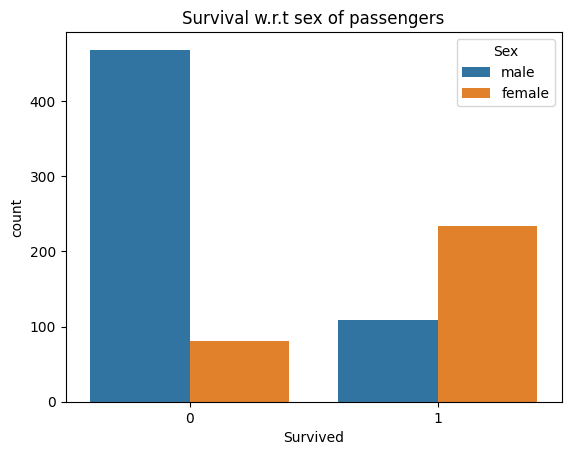

In [38]:
sns.countplot(data = titanic_df, x = 'Survived', hue = 'Sex')
plt.title("Survival w.r.t sex of passengers")

**It can be noticed that a woman has a higher probability of survival**

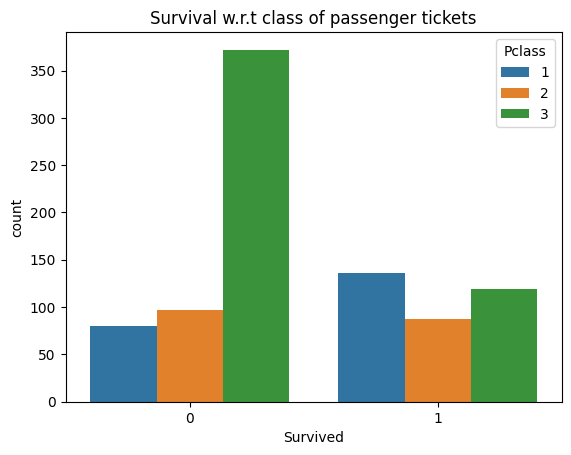

In [39]:
sns.countplot(data = titanic_df, x = 'Survived', hue = 'Pclass')
plt.title("Survival w.r.t class of passenger tickets")
plt.show()

- **Most of the people from class P = 3 did not survive.**
- **Most of the P = 1 class passengers survived.**
- **Passengers of class P = 2 survived and died almost equally**


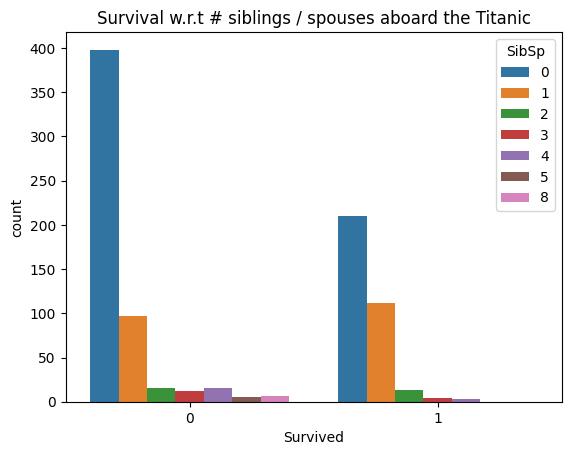

In [40]:
sns.countplot(data = titanic_df, x = 'Survived', hue = 'SibSp')
plt.title("Survival w.r.t # siblings / spouses aboard the Titanic")
plt.show()

**It can be noticed that a person survives more if he is alone or with one person**

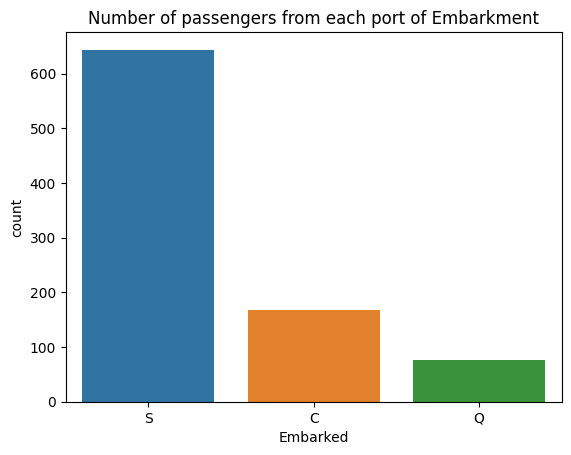

In [41]:
sns.countplot(data = titanic_df, x = 'Embarked')
plt.title("Number of passengers from each port of Embarkment")
plt.show()

Ports of Embarkment
- C: Cherbourg
- Q: Queenstown
- S: Southampton

**We can observe that most people embarked from the city of Southampton**

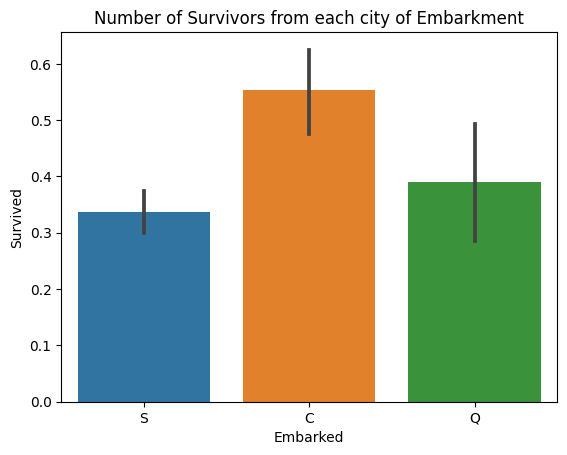

In [42]:
sns.barplot(data = titanic_df, x = 'Embarked', y = 'Survived')
plt.title("Number of Survivors from each city of Embarkment")
plt.show()


**Most of the survivors are from Cherbourg**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


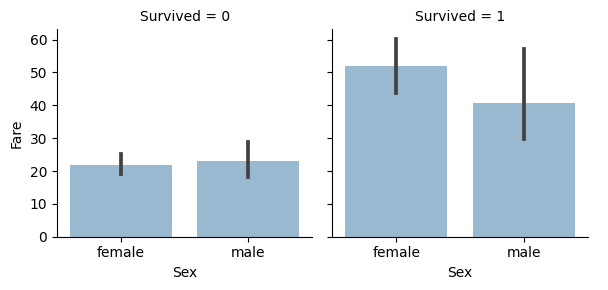

In [44]:
grid = sns.FacetGrid(titanic_df, col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()
plt.show()

We can notice that passengers survived more if they had a higher fare

<ipython-input-46-b1ccde715558>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( titanic_df.drop('PassengerId', axis=1).corr(), cmap='RdBu_r', annot=True)


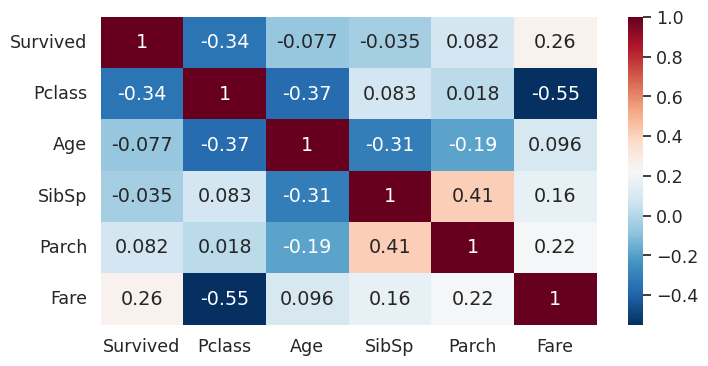

In [46]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap( titanic_df.drop('PassengerId', axis=1).corr(), cmap='RdBu_r', annot=True)
plt.show()